In [1]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [4]:
#path for the training set
tr_path = "/Users/siyaksares/Developer/Educational Stuff/YZTA/DATATHON/academy2025/train.csv"
#path for the testing set
te_path = "/Users/siyaksares/Developer/Educational Stuff/YZTA/DATATHON/academy2025/testFeatures.csv"

In [5]:
# read in csv file as a DataFrame
tr_df = pd.read_csv(tr_path)
# explore the first 5 rows
tr_df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2019-01-01,kıyma,120,et,32.70,Yurt içi,K,S
1,2019-01-01,tavuk,103,et,11.04,Yurt içi,K,S
2,2019-01-01,hindi,160,et,11.20,Yurt içi,K,S
3,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,7.04,Yurt içi,K,S
4,2019-01-01,Bakla-taze,72,sebze ve bakliyat,13.28,Yurt içi,K,S


In [6]:
# read in csv file as a DataFrame
te_df = pd.read_csv(te_path)
# explore the first 5 rows
te_df.head()

,id,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,0,2024-01-01,kıyma,120,et,Yurt içi,K,S
1,1,2024-01-01,tavuk,103,et,Yurt içi,K,S
2,2,2024-01-01,hindi,160,et,Yurt içi,K,S
3,3,2024-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,K,S
4,4,2024-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,K,S


In [7]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (227520, 8)

testing set (row, col): (45504, 8)


In [10]:
#summary statistics test
te_df.describe()

,id,ürün besin değeri
count,45504.000000,45504.000000
mean,22751.500000,143.113924
std,13136.017661,133.220042
min,0.000000,8.000000
25%,11375.750000,41.000000
50%,22751.500000,83.000000
75%,34127.250000,250.000000
max,45503.000000,402.000000


In [11]:
#summary statistics train
tr_df.describe()

,ürün besin değeri,ürün fiyatı
count,227520.000000,227520.000000
mean,143.113924,17.018837
std,133.218871,14.470524
min,8.000000,0.740000
25%,41.000000,7.380000
50%,83.000000,12.860000
75%,250.000000,21.630000
max,402.000000,164.530000


In [12]:
#missing values in decsending order
print("Train:\n")
print(tr_df.isnull().sum().sort_values(ascending=False),"\n\n",tr_df.isnull().sum()/tr_df.shape[0] *100,"\n\n")
print("Test:\n")
print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

Train:

tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün fiyatı          0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64 

 tarih                0.0
ürün                 0.0
ürün besin değeri    0.0
ürün kategorisi      0.0
ürün fiyatı          0.0
ürün üretim yeri     0.0
market               0.0
şehir                0.0
dtype: float64 


Test:

id                   0
tarih                0
ürün                 0
ürün besin değeri    0
ürün kategorisi      0
ürün üretim yeri     0
market               0
şehir                0
dtype: int64 

 id                   0.0
tarih                0.0
ürün                 0.0
ürün besin değeri    0.0
ürün kategorisi      0.0
ürün üretim yeri     0.0
market               0.0
şehir                0.0
dtype: float64 




In [16]:
print("train:\n")
print(tr_df.info())
print("\n\ntest:\n")
print(te_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB
None


test:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 45504 non-null  int64 
 1   tarih              45504 non-null  object
 2   ürün          

In [17]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  tr_df[num]
#categoric df
BM_cat = tr_df[cat]

#print(num)
#print(cat)

[tr_df[category].value_counts() for category in cat[1:]]

[ürün
 kıyma            2880
 salam            2880
 Çilek            2880
 Armut            2880
 tereyağ          2880
                  ... 
 Nohut            2880
 Mercimek-kuru    2880
 Marul            2880
 Mantar           2880
 ceviz            2880
 Name: count, Length: 79, dtype: int64,
 ürün kategorisi
 sebze ve bakliyat              83520
 meyve                          51840
 tahıl ve ürünleri              34560
 süt ürünleri ve kahvaltılık    34560
 kuruyemiş                      14400
 et                              8640
 Name: count, dtype: int64,
 ürün üretim yeri
 Yurt içi     113760
 Yurt dışı    113760
 Name: count, dtype: int64,
 market
 K    75840
 C    75840
 Y    75840
 Name: count, dtype: int64,
 şehir
 S    28440
 E    28440
 V    28440
 A    28440
 L    28440
 F    28440
 G    28440
 H    28440
 Name: count, dtype: int64]

In [19]:
from datetime import datetime

current_year = datetime.now().year

# Tarih string'ini datetime'a çevirip, yıl bilgisini alarak çıkarma yapma
tr_df['Urun_Yas'] = tr_df['tarih'].apply(lambda date_str: current_year - pd.to_datetime(date_str).year)
te_df['Urun_Yas'] = te_df['tarih'].apply(lambda date_str: current_year - pd.to_datetime(date_str).year)

In [21]:
from datetime import datetime
import pandas as pd

# Güncel yılı al
current_year = datetime.now().year

# Eğitim setinde tarihleri yaşa çevir
tr_df['Urun_Yas'] = pd.to_datetime(tr_df['tarih'], errors='coerce').dt.year
tr_df['Urun_Yas'] = current_year - tr_df['Urun_Yas']

# Test setinde de aynısını yap
te_df['Urun_Yas'] = pd.to_datetime(te_df['tarih'], errors='coerce').dt.year
te_df['Urun_Yas'] = current_year - te_df['Urun_Yas']

# Kontrol et
print(tr_df[['tarih', 'Urun_Yas']].head())


        tarih  Urun_Yas
0  2019-01-01         6
1  2019-01-01         6
2  2019-01-01         6
3  2019-01-01         6
4  2019-01-01         6


In [22]:
tr_df['Urun_Yas'].head
te_df['Urun_Yas'].head

<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
45499    1
45500    1
45501    1
45502    1
45503    1
Name: Urun_Yas, Length: 45504, dtype: int32>

In [23]:
# Kategorik değişkenleri listeleyelim
cat_cols = tr_df.select_dtypes(include='object').columns.tolist()
print("Kategorik Değişkenler:", cat_cols)


Kategorik Değişkenler: ['tarih', 'ürün', 'ürün kategorisi', 'ürün üretim yeri', 'market', 'şehir']


In [25]:
cat = tr_df.select_dtypes('object').columns.to_list()


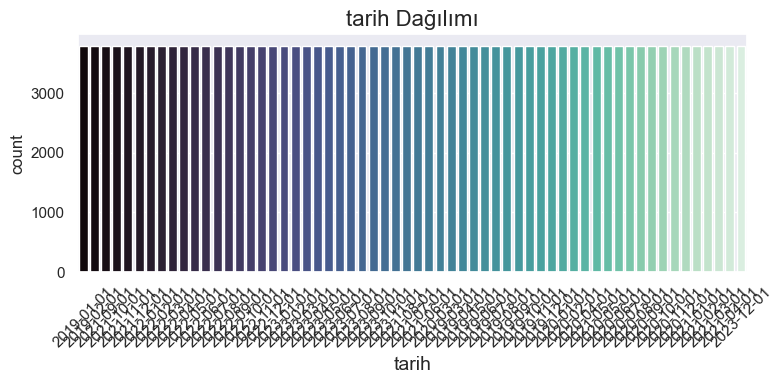

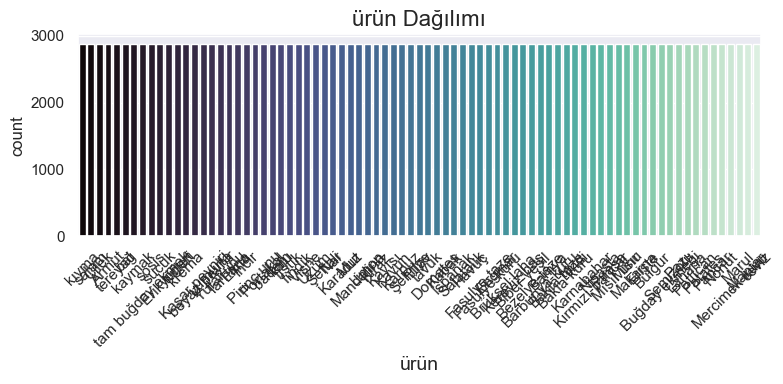

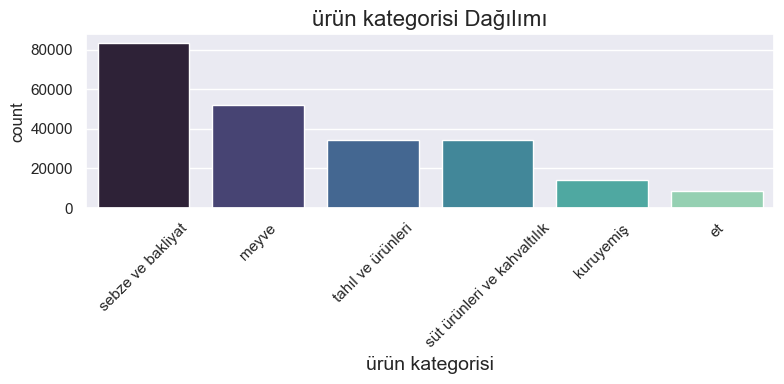

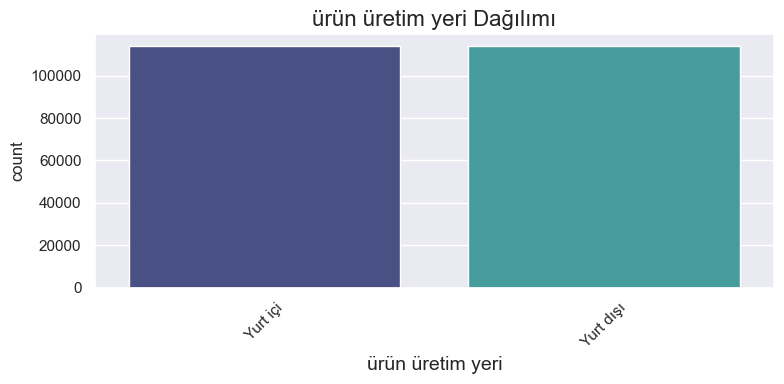

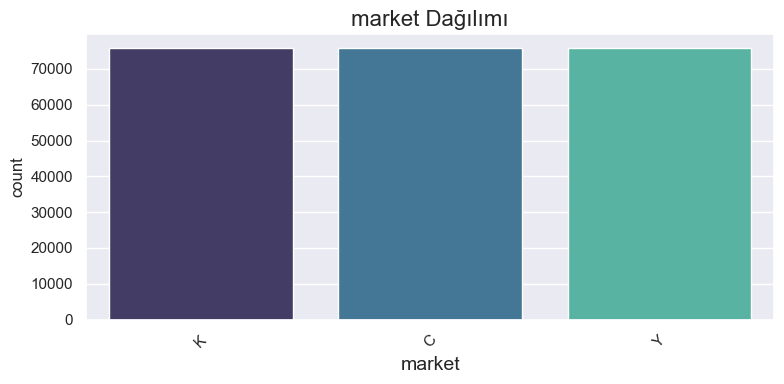

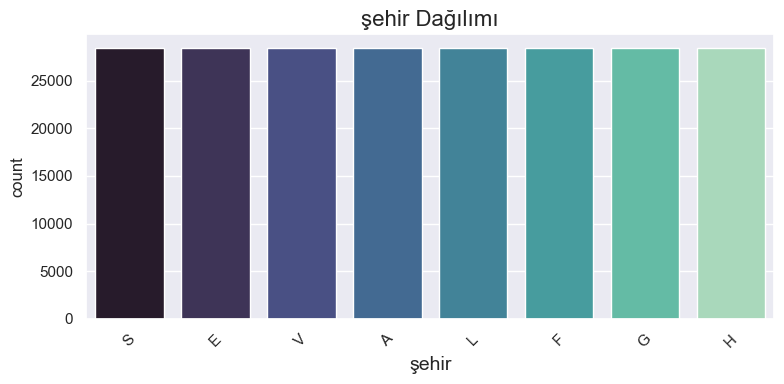

In [26]:
# Kategorik sütunları tek tek çizdir
for col in cat:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=tr_df, x=col, palette='mako', order=tr_df[col].value_counts().index)
    plt.xlabel(col, fontsize=14)
    plt.title(f"{col} Dağılımı", fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


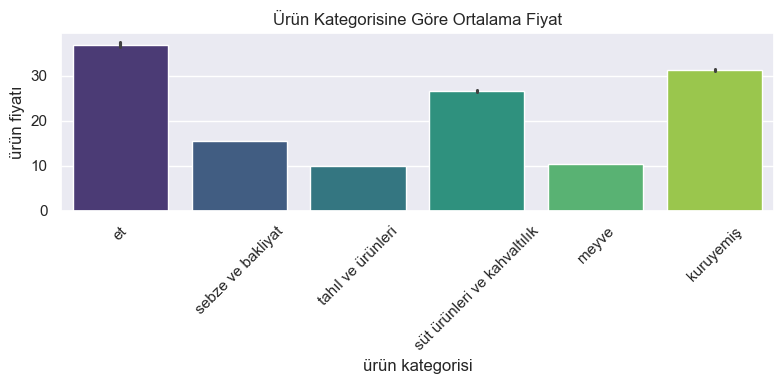

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(data=tr_df, x='ürün kategorisi', y='ürün fiyatı', estimator=np.mean, palette='viridis')
plt.title("Ürün Kategorisine Göre Ortalama Fiyat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


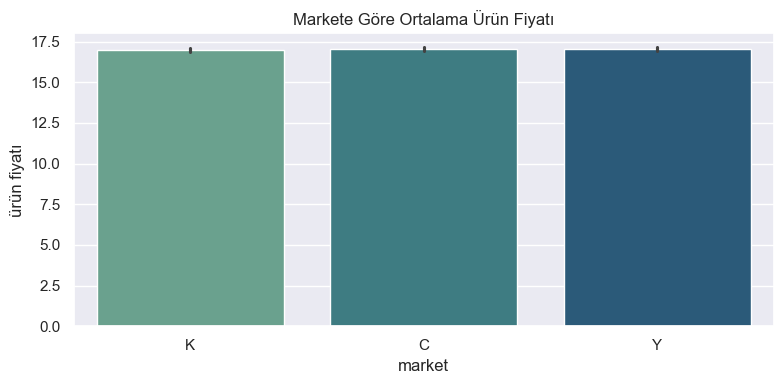

In [29]:
plt.figure(figsize=(8,4))
sns.barplot(data=tr_df, x='market', y='ürün fiyatı', estimator=np.mean, palette='crest')
plt.title("Markete Göre Ortalama Ürün Fiyatı")
plt.tight_layout()
plt.show()


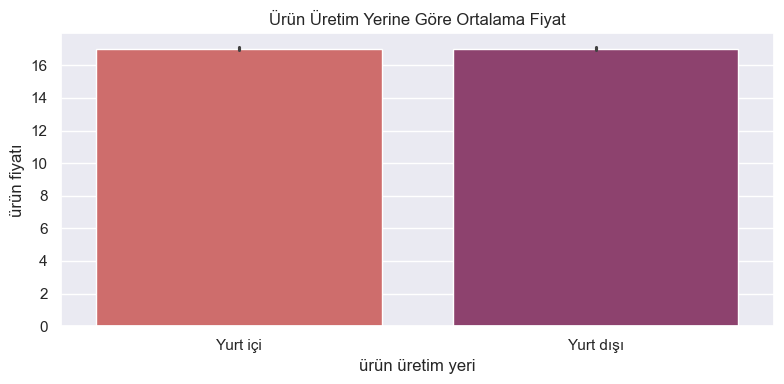

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=tr_df, x='ürün üretim yeri', y='ürün fiyatı', estimator=np.mean, palette='flare')
plt.title("Ürün Üretim Yerine Göre Ortalama Fiyat")
plt.tight_layout()
plt.show()


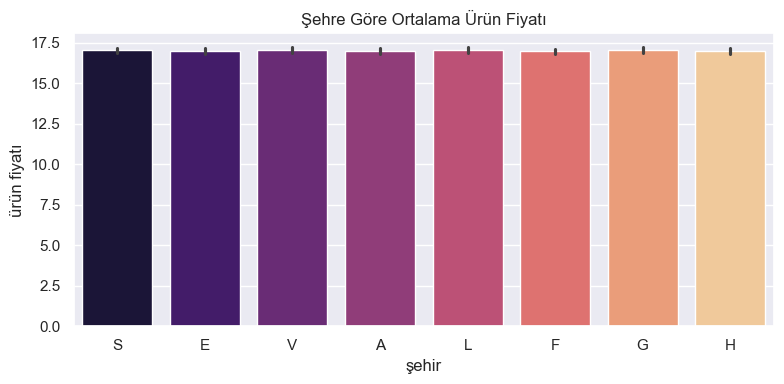

In [31]:
plt.figure(figsize=(8,4))
sns.barplot(data=tr_df, x='şehir', y='ürün fiyatı', estimator=np.mean, palette='magma')
plt.title("Şehre Göre Ortalama Ürün Fiyatı")
plt.tight_layout()
plt.show()


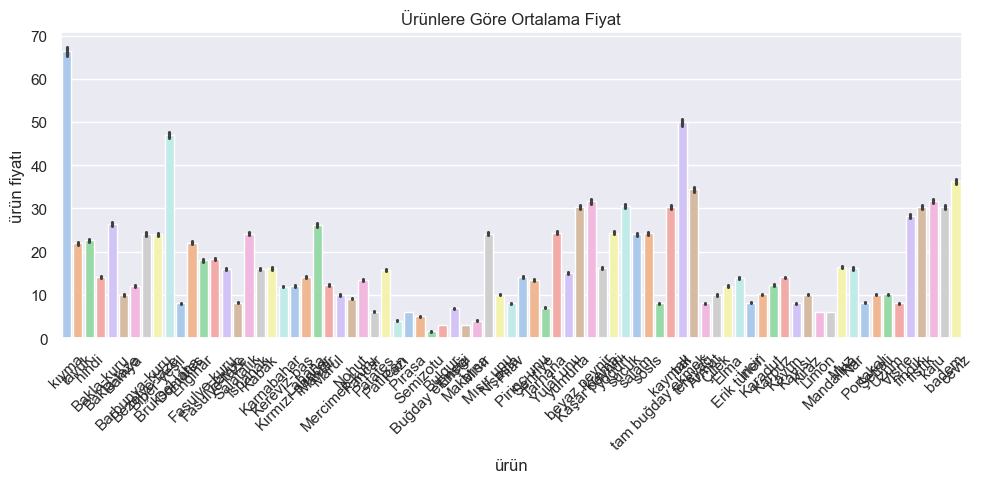

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=tr_df, x='ürün', y='ürün fiyatı', estimator=np.mean, palette='pastel')
plt.title("Ürünlere Göre Ortalama Fiyat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


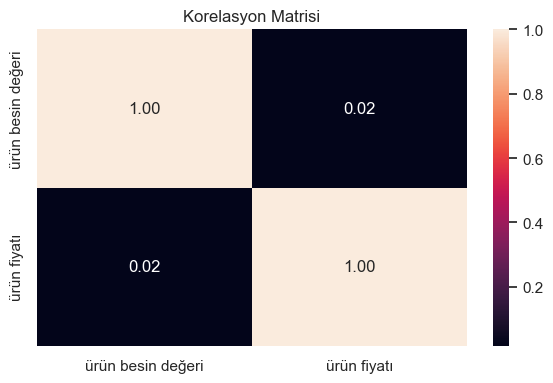

In [34]:
# Sadece sayısal sütunları al
numeric_cols = tr_df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisini hesapla
corr_matrix = numeric_cols.corr()

# Korelasyon ısı haritası
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title("Korelasyon Matrisi")
plt.tight_layout()
plt.show()
